<a href="https://colab.research.google.com/github/yesung05/2025-1-myclass-BDA/blob/main/inclass/10w_A_mon_1519_mon_easy_ch08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 10주: 단원 08-3 그래프 만들기

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
!pip install koreanize_matplotlib

In [17]:
%config InlineBackend.figure_format = 'retina'

In [18]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [19]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [10]:
pd.set_option('display.precision', 2)

In [20]:
df_mpg = mpg.groupby('drv').agg(mean_hwy =('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [21]:
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy =('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.17
1,f,28.16
2,r,21.00


In [25]:
plt.rcParams.update({'figure.figsize' : [5,3]})

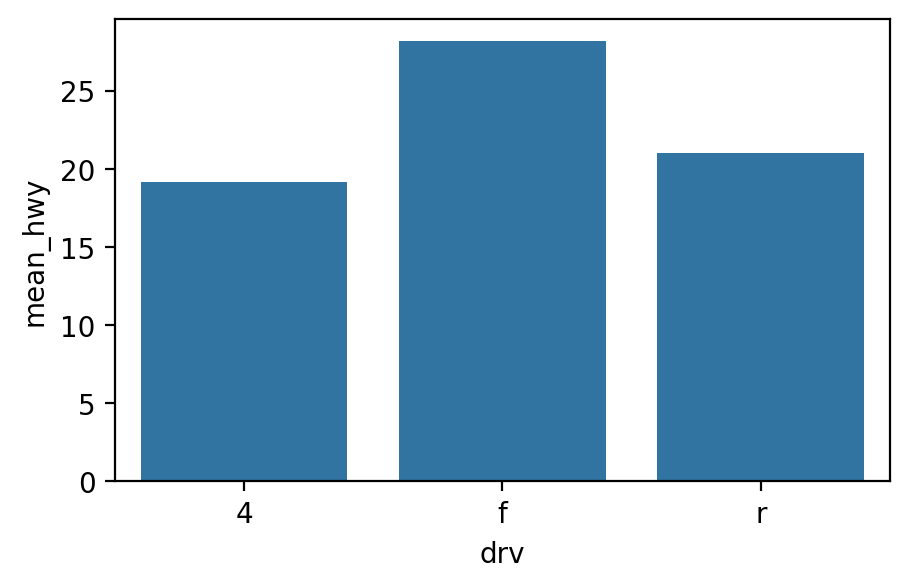

In [26]:
sns.barplot(data = df_mpg, x='drv', y='mean_hwy');

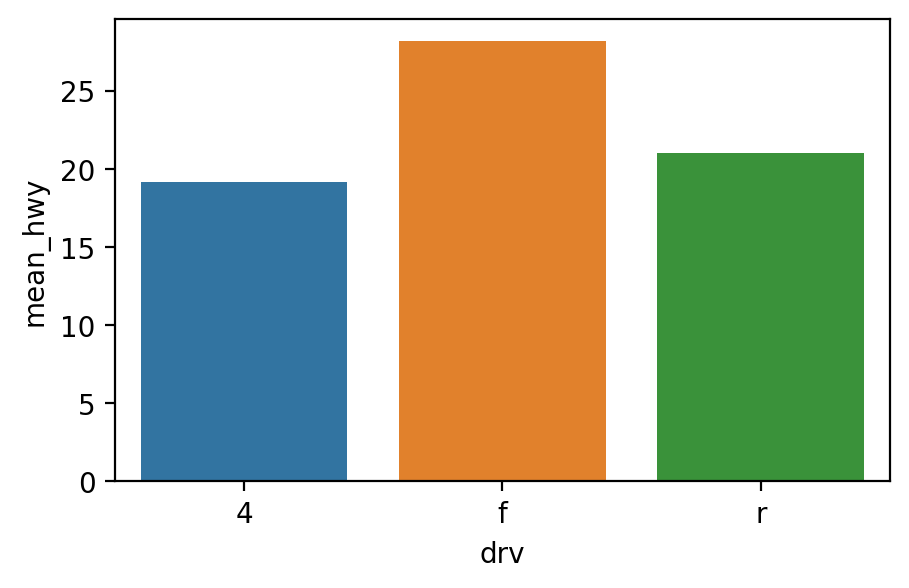

In [27]:
sns.barplot(data = df_mpg, x='drv', y='mean_hwy', hue = 'drv');

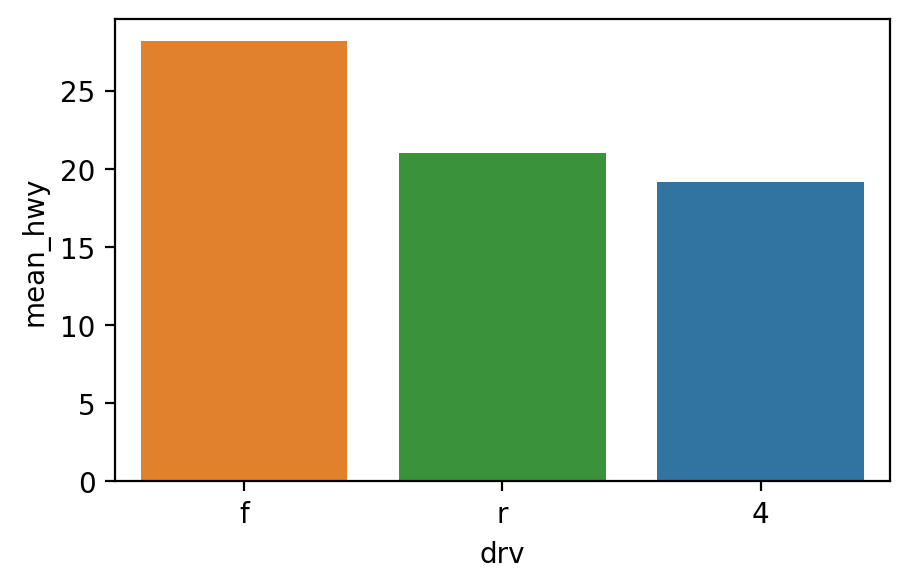

In [28]:
sns.barplot(data = df_mpg, x='drv', y='mean_hwy', hue = 'drv', order = ['f', 'r', '4']);

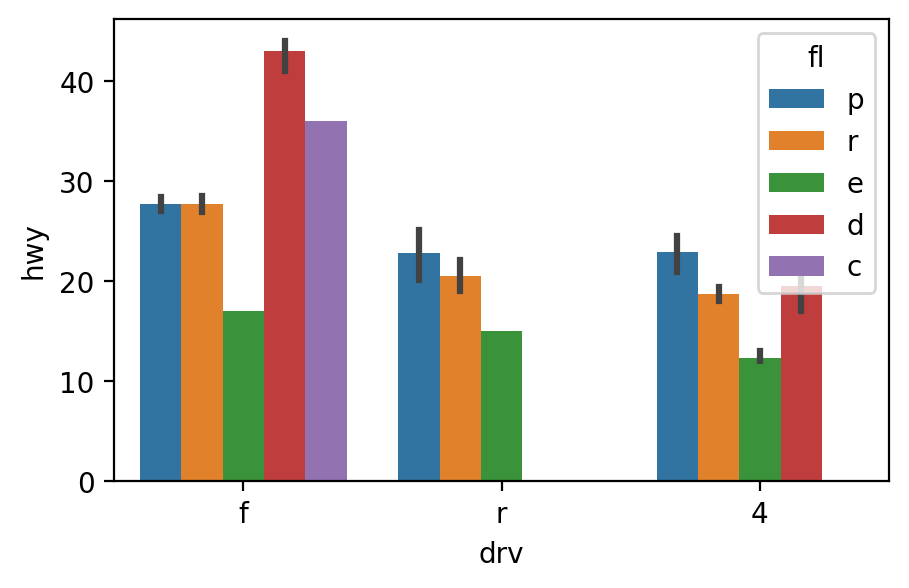

In [31]:
sns.barplot(data = mpg, x='drv', y='hwy', hue = 'fl', order = ['f', 'r', '4']);

In [33]:
mpg.groupby('drv', as_index = False).count()

,drv,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
0,4,103,103,103,103,103,103,103,103,103,103
1,f,106,106,106,106,106,106,106,106,106,106
2,r,25,25,25,25,25,25,25,25,25,25


In [34]:
mpg.groupby('drv', as_index = False).count()[['drv', 'model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [35]:
mpg.groupby('drv', as_index = False).count()[['drv', 'model']].rename(columns = {'model' : 'n'})

,drv,n
0,4,103
1,f,106
2,r,25


In [41]:
df_mpg = mpg.groupby('drv', as_index = False).agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


In [42]:
df_mpg2 = mpg.groupby('drv').agg(n = ('drv', 'count'))
df_mpg2

,n
drv,
4,103
f,106
r,25


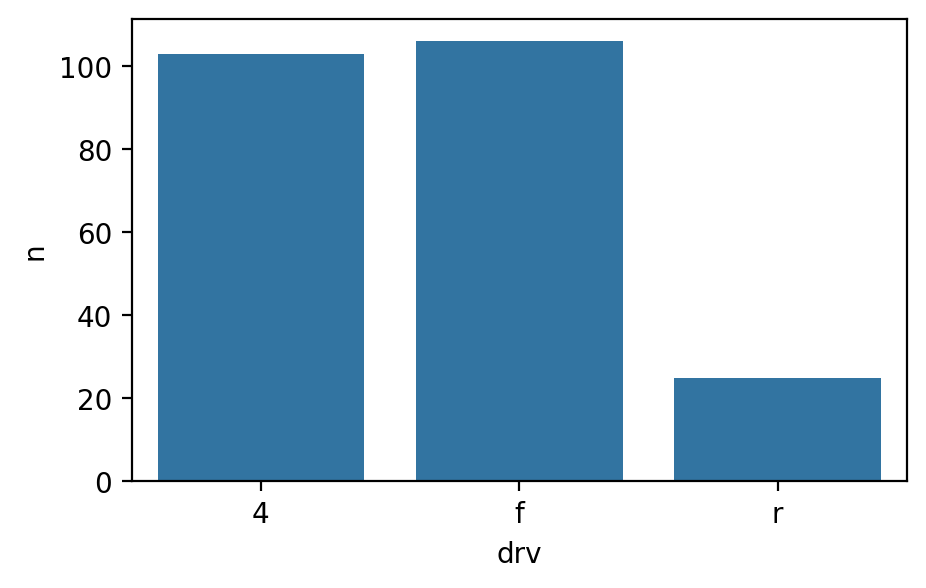

In [43]:
sns.barplot(df_mpg, x='drv', y='n');

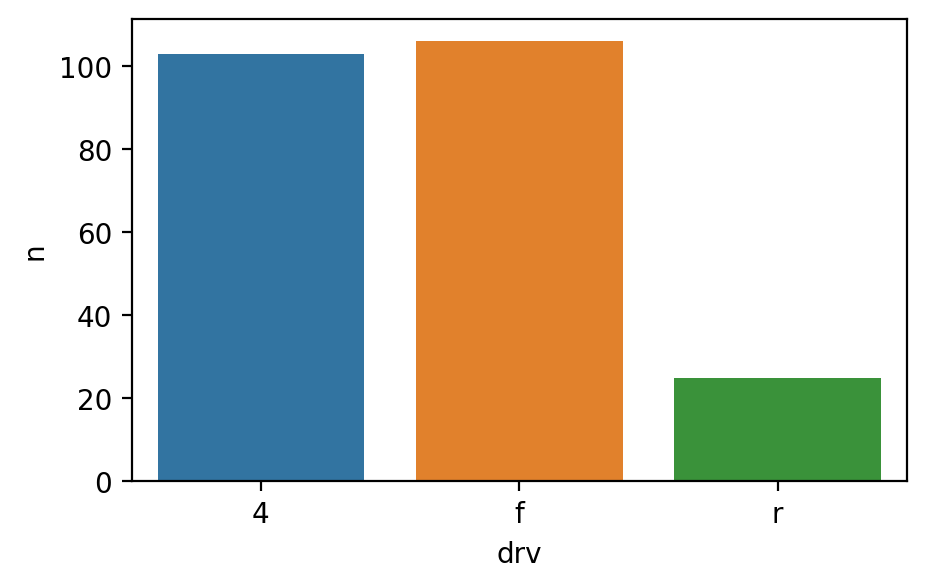

In [44]:
sns.barplot(df_mpg, x='drv', y='n', hue='drv');

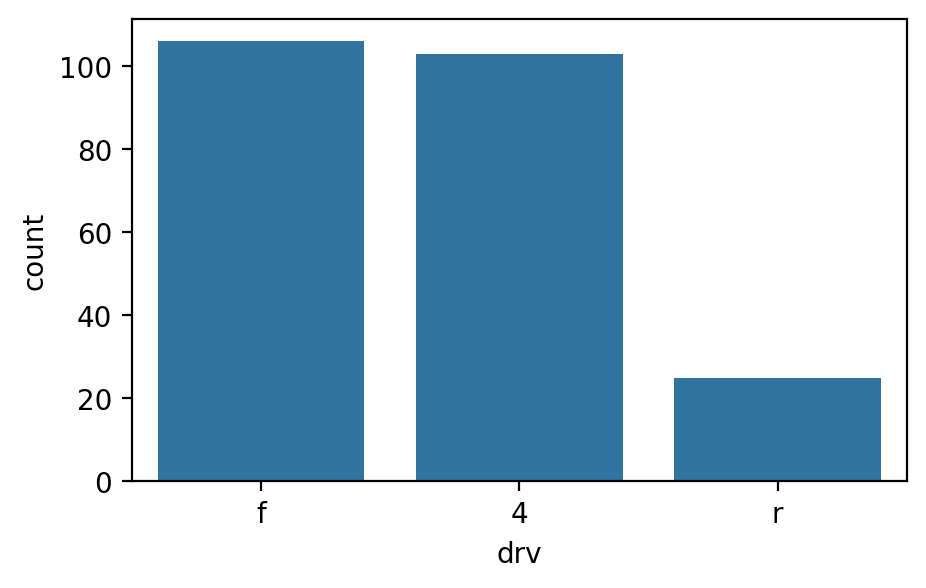

In [48]:
sns.countplot(mpg, x='drv');

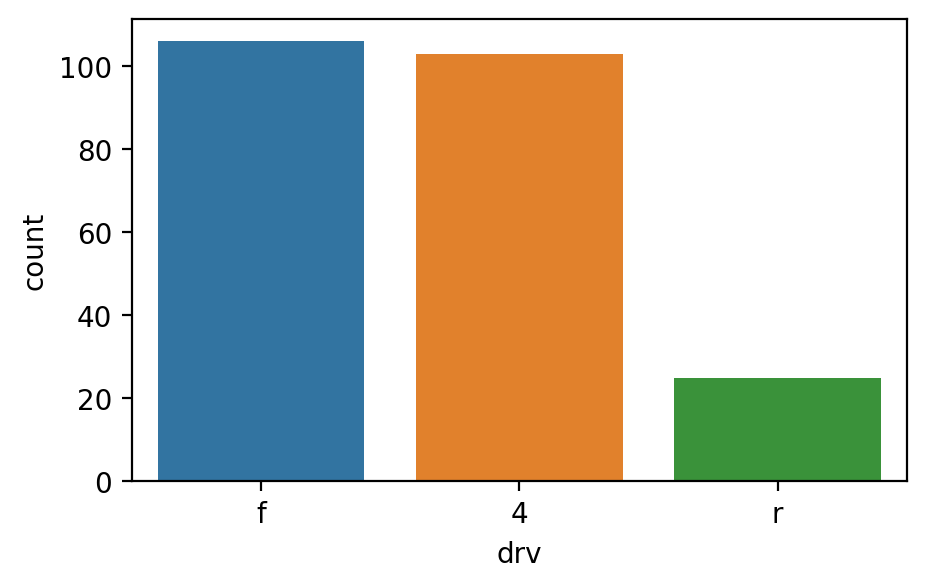

In [50]:
sns.countplot(mpg, x='drv', hue='drv');

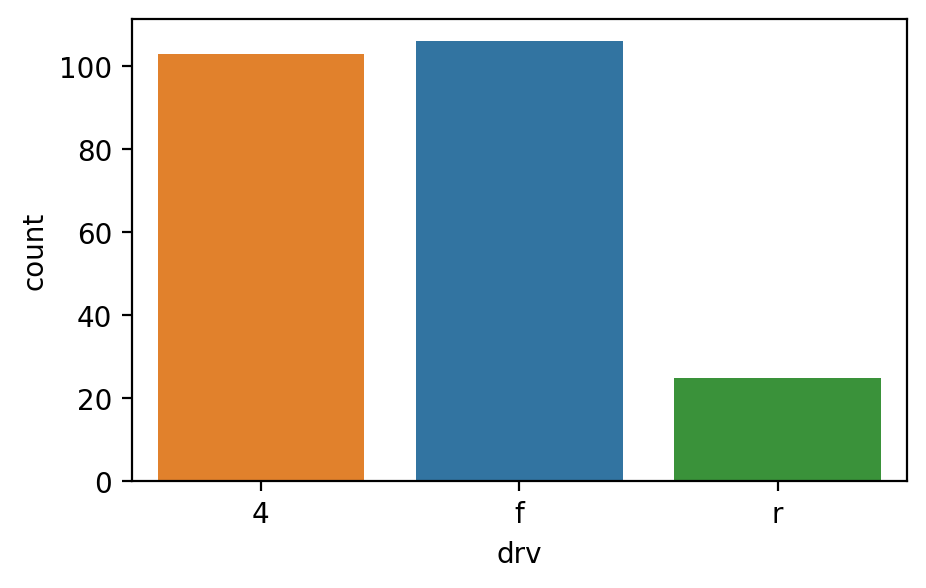

In [51]:
sns.countplot(mpg, x='drv', order = ['4', 'f','r'], hue='drv');

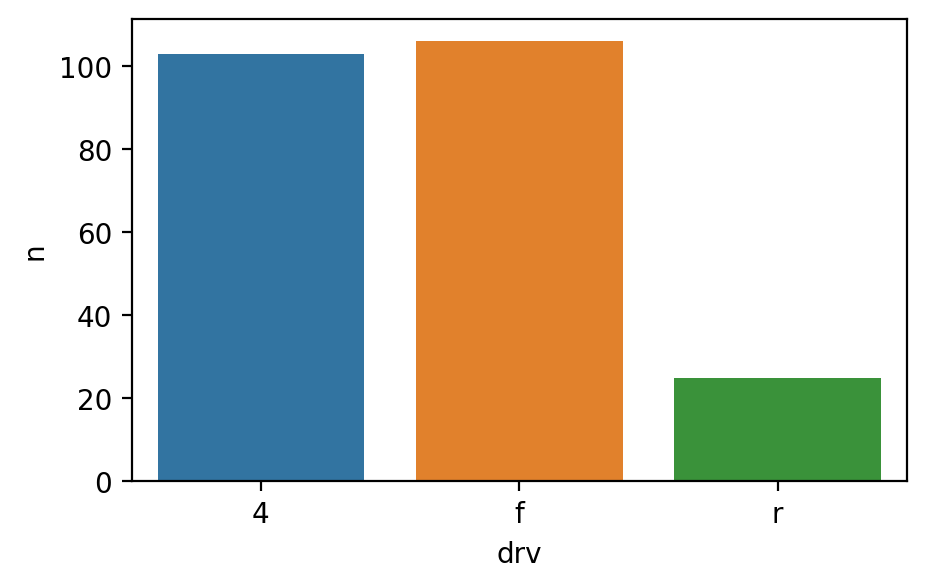

In [53]:
sns.barplot(df_mpg, x='drv', y='n', hue='drv');

In [54]:
economics = pd.read_csv('data/economics.csv')
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


| 변수 이름      | 설명                                               |
| ---------- | ------------------------------------------------ |
| `date`     | 날짜 (연-월-일 형식, 월 단위)                              |
| `pce`      | 개인 소비 지출 (Personal Consumption Expenditures)     |
| `pop`      | 인구 (Population, 천 명 단위)                          |
| `psavert`  | 개인 저축률 (Personal Savings Rate, %)                |
| `uempmed`  | 평균 실업 기간 (Median Duration of Unemployment, 주 단위) |
| `unemploy` | 실업자 수 (Unemployed in thousands)                  |


In [55]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [56]:
economics.tail()

,date,pce,pop,psavert,uempmed,unemploy
569,2014-12-01,12062.0,319746.16,7.6,12.9,8717
570,2015-01-01,12046.0,319928.65,7.7,13.2,8903
571,2015-02-01,12082.4,320074.51,7.9,12.9,8610
572,2015-03-01,12158.3,320230.79,7.4,12.0,8504
573,2015-04-01,12193.8,320402.29,7.6,11.5,8526


In [58]:
economics.shape

(574, 6)

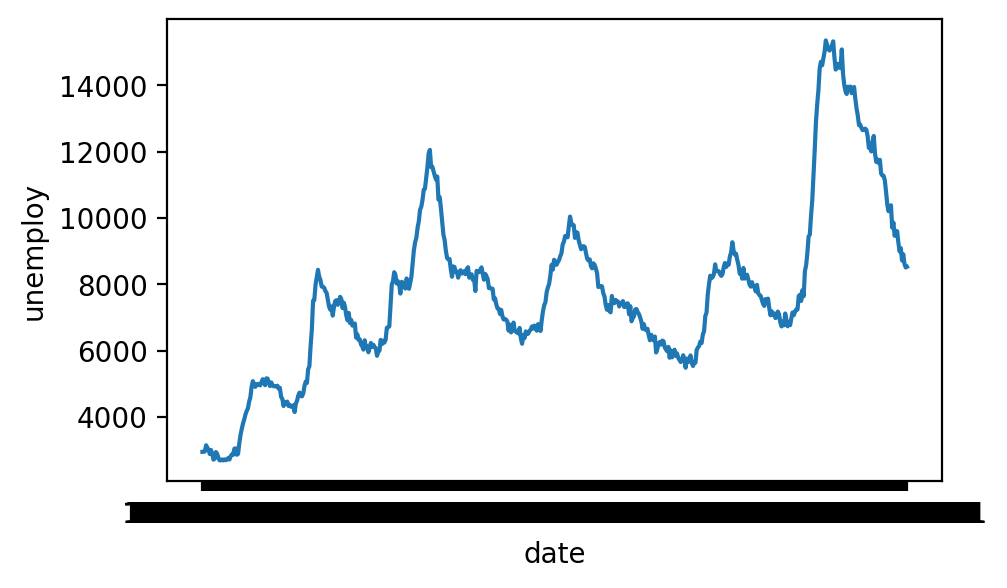

In [61]:
sns.lineplot(economics, x = 'date', y='unemploy');

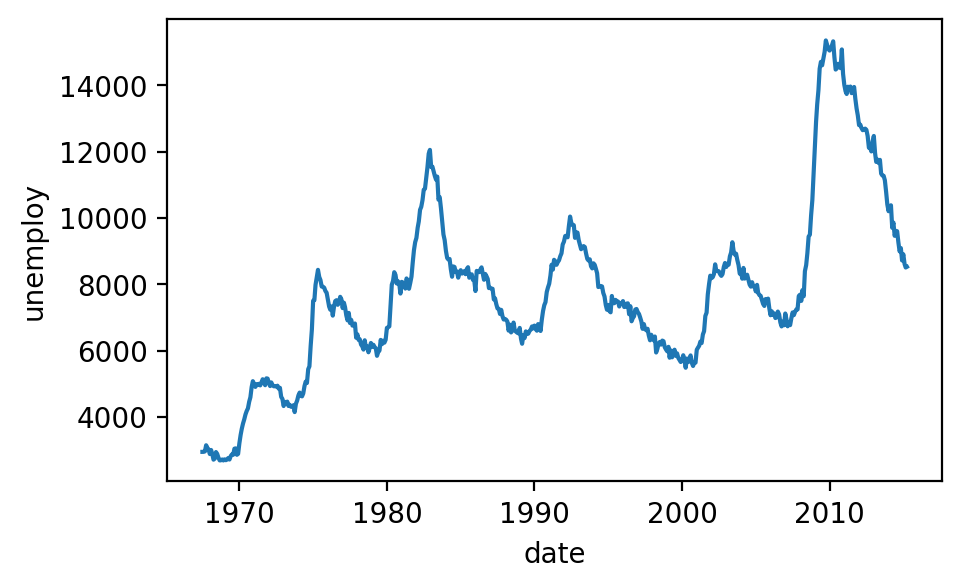

In [62]:
sns.lineplot(economics, x = pd.to_datetime(economics['date']), y='unemploy');

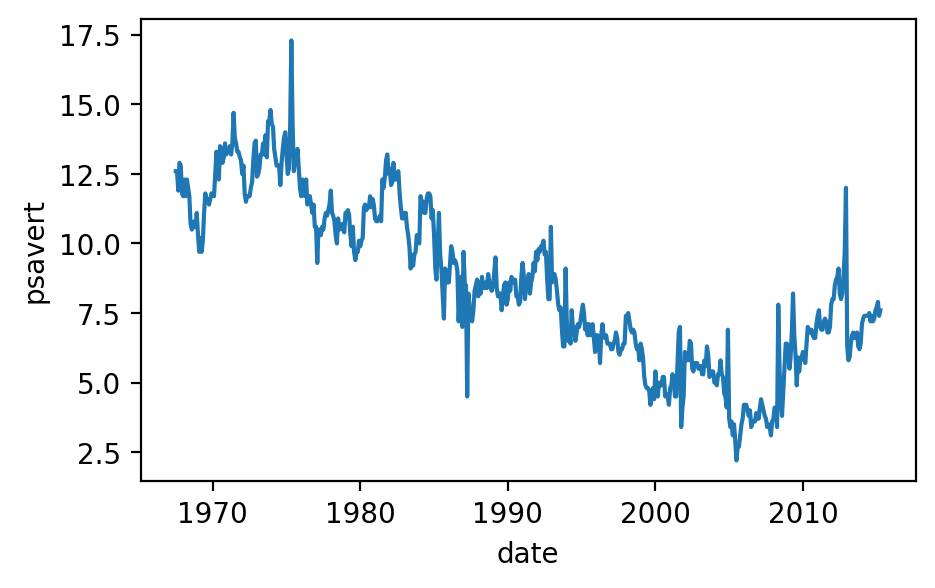

In [64]:
sns.lineplot(economics, x = pd.to_datetime(economics['date']), y='psavert');

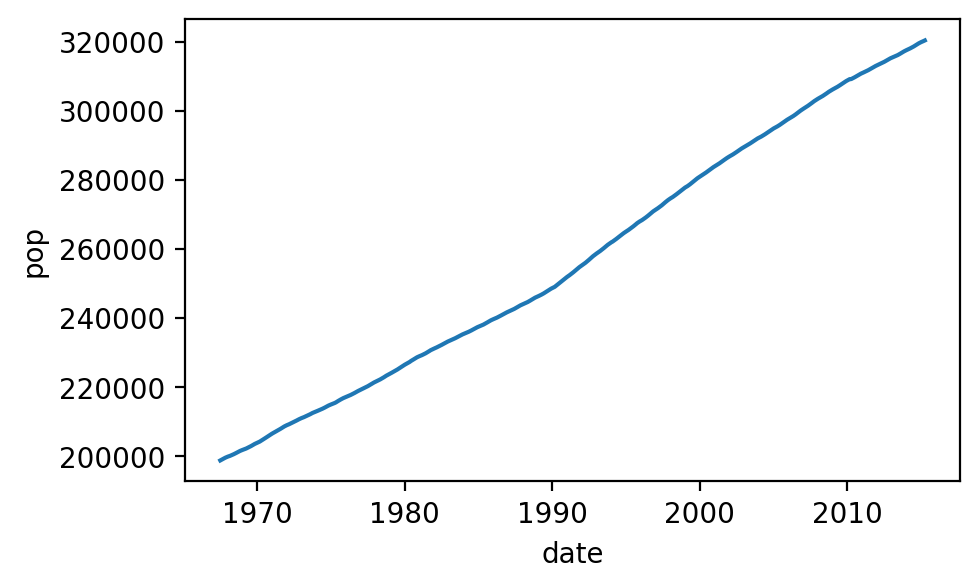

In [65]:
sns.lineplot(economics, x = pd.to_datetime(economics['date']), y='pop');

In [66]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [67]:
economics['date2'] = pd.to_datetime(economics['date'])

In [68]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [72]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [73]:
economics[['date', 'date2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    574 non-null    object        
 1   date2   574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 9.1+ KB


In [77]:
economics.date2.dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [78]:
economics.date2.dt.month

,date2
0,7
1,8
2,9
3,10
4,11
...,...
569,12
570,1
571,2
572,3


In [79]:
economics.date2.dt.day

,date2
0,1
1,1
2,1
3,1
4,1
...,...
569,1
570,1
571,1
572,1


In [81]:
economics['year'] = economics['date2'].dt.year
economics['month'] = economics['date2'].dt.month
economics['day'] = economics['date2'].dt.day
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
 8   month     574 non-null    int32         
 9   day       574 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(1)
memory usage: 38.2+ KB


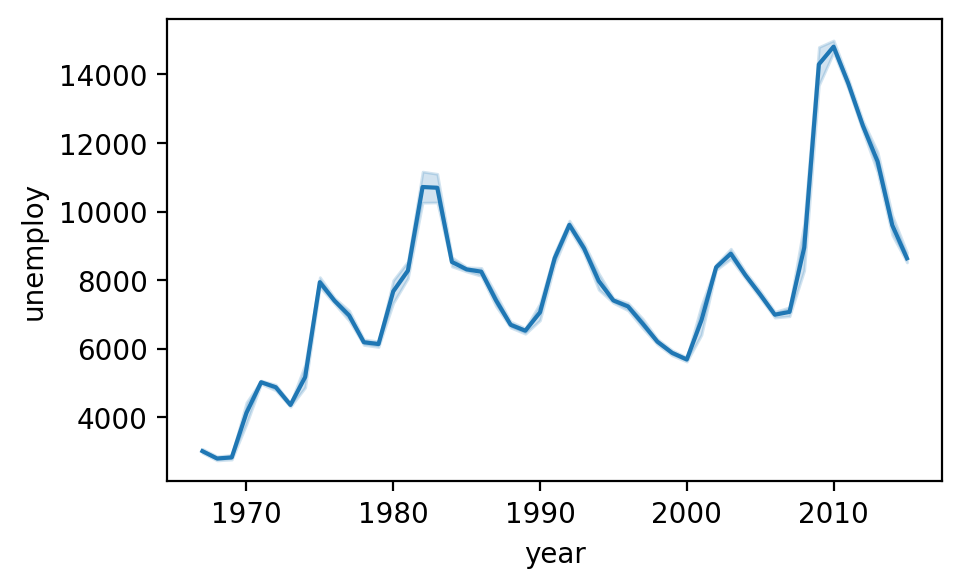

In [82]:
sns.lineplot(economics, x = economics['year'], y='unemploy');

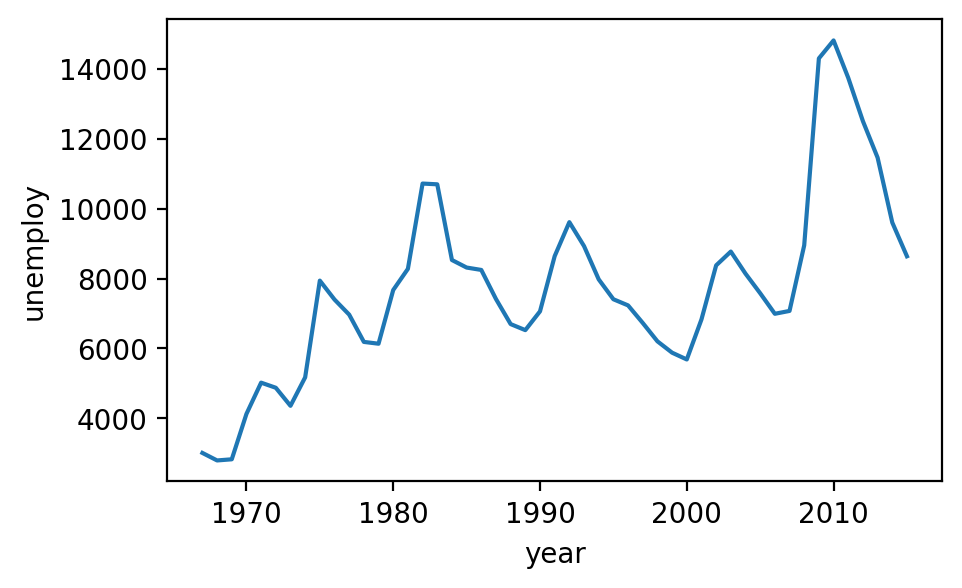

In [83]:
sns.lineplot(economics, x = economics['year'], y='unemploy', errorbar= None);

![BoxplotDisc](https://blog.kakaocdn.net/dn/dDwo0c/btsGZlnG2OR/JKqvsOBYX8oRCutkvQkXSK/img.png)

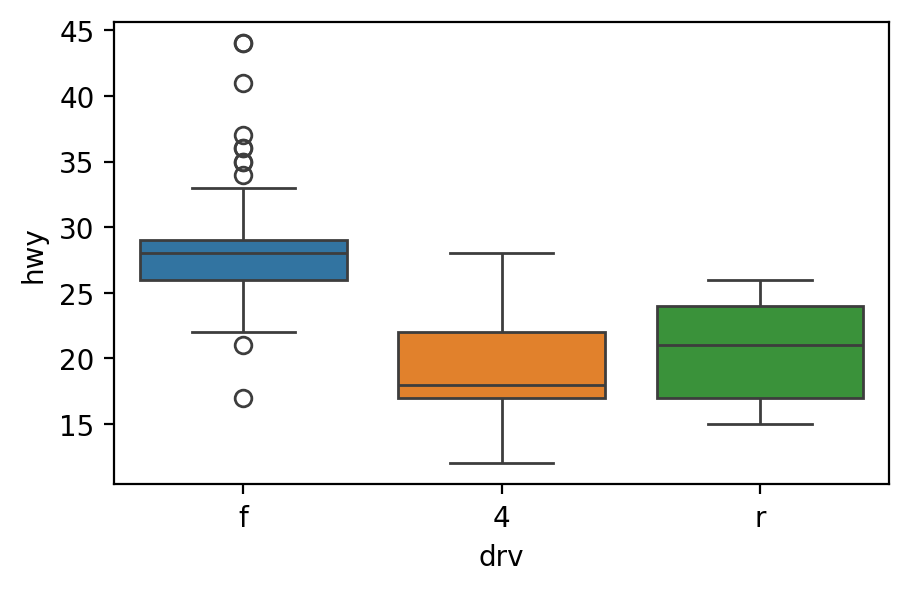

In [86]:
sns.boxplot(mpg, x='drv', y='hwy', hue='drv');

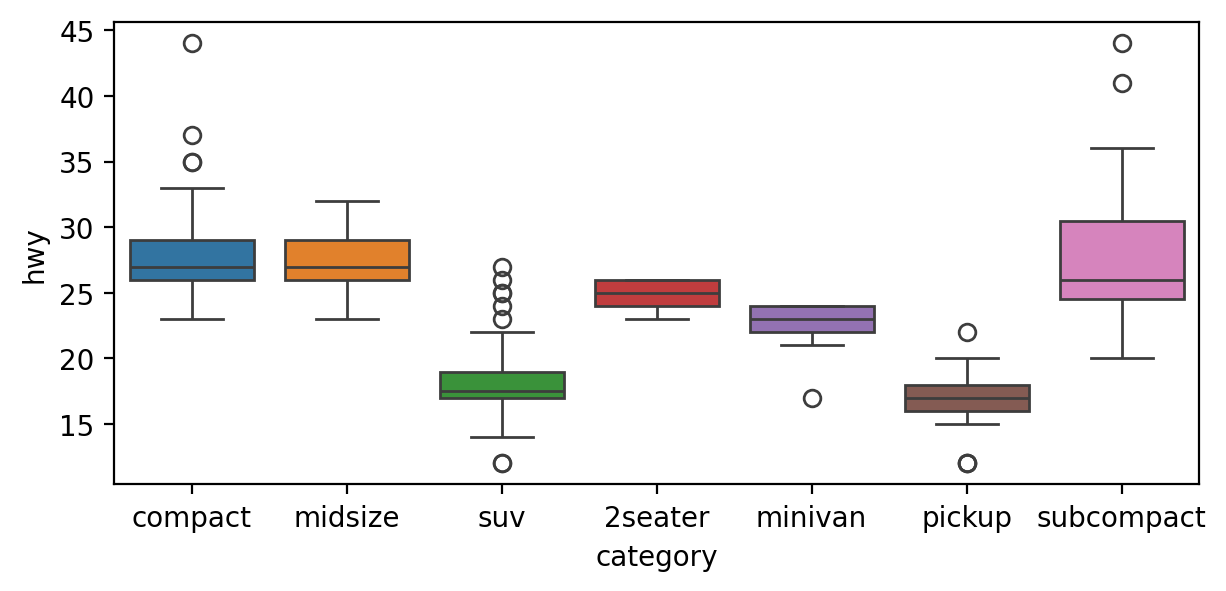

In [88]:
plt.rcParams.update({'figure.figsize' : [7,3]})
sns.boxplot(mpg, x='category', y = 'hwy', hue = 'category');

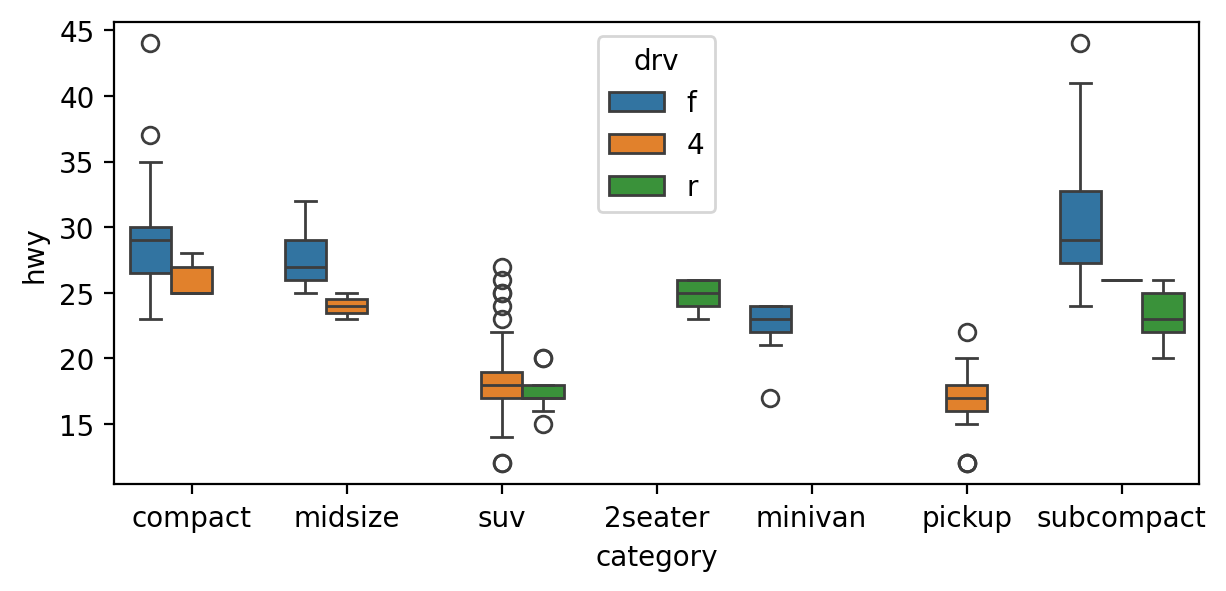

In [89]:
sns.boxplot(mpg, x='category', y = 'hwy', hue = 'drv');

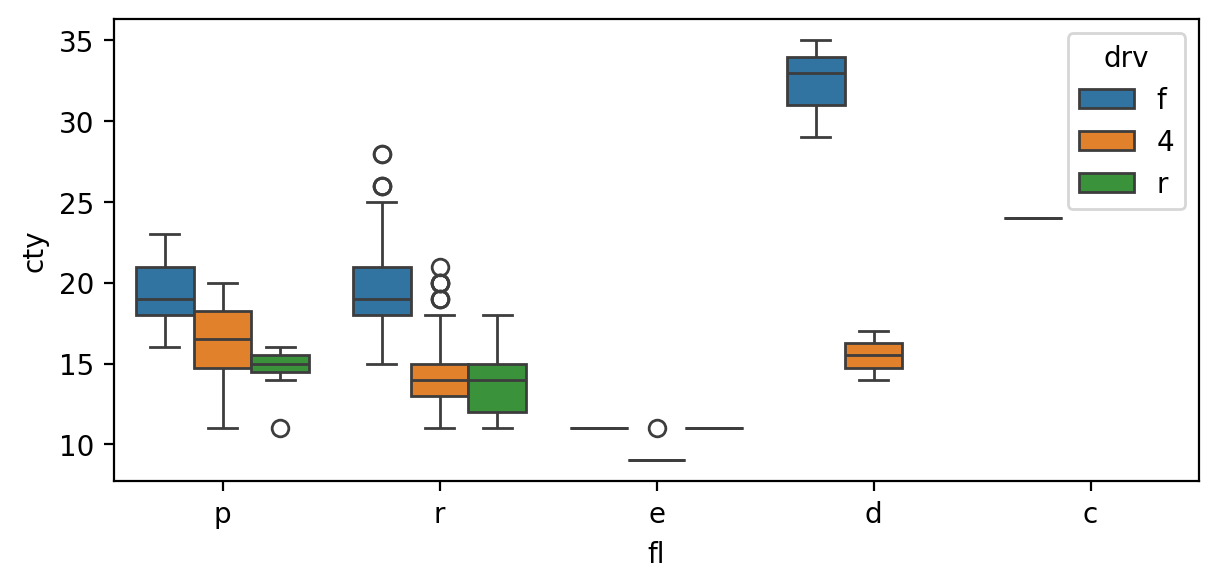

In [90]:
sns.boxplot(mpg, x='fl', y = 'cty', hue = 'drv');

In [91]:
plt.rcParams.update({'figure.figsize' : [5,3]})

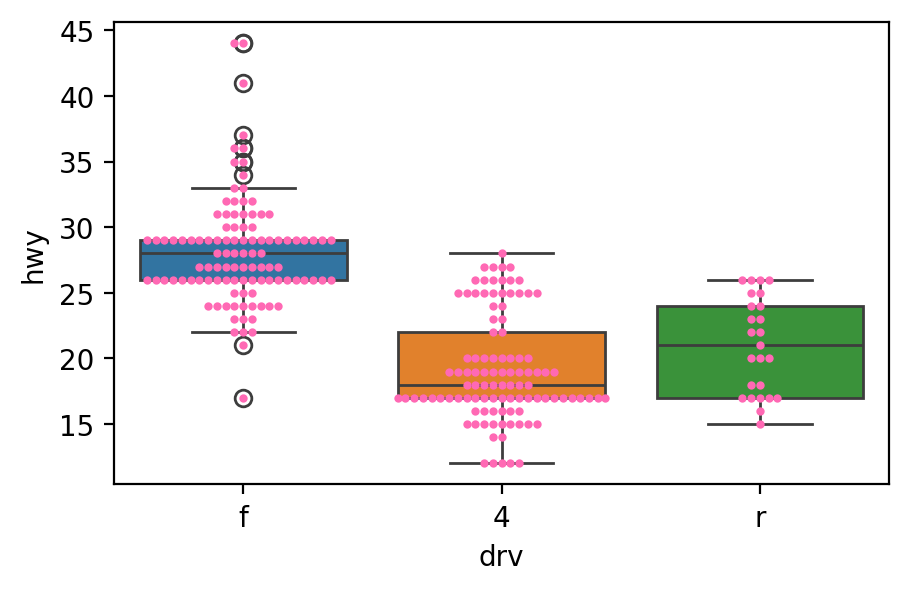

In [98]:
sns.boxplot(mpg, x = 'drv', y = 'hwy', hue = 'drv');
sns.swarmplot(mpg, x = 'drv', y = 'hwy', color = 'hotpink', size = 3);

In [99]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + ' '*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [101]:
import pandas as pd

# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 6, 7],
                      'final' : [70, 83, 65, 95, 80]})


In [102]:
display_side_by_side(test1, test2)

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [104]:
display_side_by_side(test1, test2, test1.merge(test2))

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


## 종료